In [1]:
from Bagging import create_models, create_bags, evaluate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import random
from BaggingGA import BaggingGA
from BaggingSA import BaggingSA

In [2]:
seed = 414
np.random.seed(seed)
random.seed(seed)
data = datasets.load_digits()


X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [3]:
def evaluate_bagging_ga(reps, n_trees):
    res = []
    for r in range(reps):
        bagging_ga = BaggingGA(X=X_train, y=y_train,
                           n_trees=n_trees, max_iterations=200, mutation_rate=0.2, crossover_rate=0.7, population_size=100)
        models = bagging_ga.run(X_for_test=X_test, y_for_test=y_test)
        accuracy = evaluate(X_test, y_test, models=models)
        res.append(accuracy)
    return np.mean(res), np.std(res)


def evaluate_bagging(reps, n_trees):
    res = []
    for r in range(reps):
        bags = create_bags(X_train, n_trees)
        models = create_models(X=X_train, y=y_train, bags=bags)
        accuracy = evaluate(X_test, y_test, models=models)
        res.append(accuracy)
    return np.mean(res), np.std(res)

def evaluate_bagging_nmax(reps, n_trees):
    res = []
    pop_size = 100
    for r in range(reps):
        bags = create_bags(X_train, bags_amount=pop_size)
        models = create_models(X=X_train, y=y_train, bags=bags)
        
        # get n best models
        predictions_per_model = [model.model.predict(X_test[:,model.bag.features]) for model in models]
        accuracy_per_model = [accuracy_score(y_test, pred) for pred in predictions_per_model]
        sorted_models = sorted(zip(models, accuracy_per_model), key=lambda x: x[1], reverse=True)
        best = sorted_models[:n_trees]
        models = [model for model, _ in best]
        
        accuracy = evaluate(X_test, y_test, models=models)
        res.append(accuracy)
    return np.mean(res), np.std(res)

def evaluate_bagging_sa(reps, n_trees):
    res = []
    for r in range(reps):
        bagging_sa = BaggingSA(X=X_train, y=y_train,
                               T0=1000, alpha=0.99, max_iterations=1500, n_trees=n_trees)
        models = bagging_sa.run(X_for_test=X_test, y_for_test=y_test)
        accuracy = evaluate(X_test, y_test, models=models)
        res.append(accuracy)
    return np.mean(res), np.std(res)

def evaluate_decision_tree(reps):
    res = []
    for r in range(reps):
        model = DecisionTreeClassifier()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        res.append(accuracy)
    return np.mean(res), np.std(res)

In [4]:
n_trees = [5, 10, 15, 20, 25]
reps = 10

results = []

for n in n_trees:
    dt_mean, dt_std = evaluate_decision_tree(reps)
    bagging_mean, bagging_std = evaluate_bagging(reps, n)
    bagging_nmax_mean, bagging_nmax_std = evaluate_bagging_nmax(reps, n)
    bagging_ga_mean, bagging_ga_std = evaluate_bagging_ga(reps, n)
    bagging_sa_mean, bagging_sa_std = evaluate_bagging_sa(reps, n)
    
    results.append({
        'n_trees': n,
        'decision_tree_mean': dt_mean,
        'decision_tree_std': dt_std,
        'bagging_mean': bagging_mean,
        'bagging_std': bagging_std,
        'bagging_nmax_mean': bagging_nmax_mean,
        'bagging_nmax_std': bagging_nmax_std,
        'bagging_ga_mean': bagging_ga_mean,
        'bagging_ga_std': bagging_ga_std,
        'bagging_sa_mean': bagging_sa_mean,
        'bagging_sa_std': bagging_sa_std
    })
    results_df = pd.DataFrame(results)
    results_df.to_csv(f'./../res/bagging_multiple_results_{reps}.csv', index=False)
    
print(results_df)

Iteration 0, Best fitness: 0.512, Fitness: 0.512, Accuracy: 0.825
Iteration 1, Best fitness: 0.512, Fitness: 0.503, Accuracy: 0.836
Iteration 2, Best fitness: 0.512, Fitness: 0.507, Accuracy: 0.817
Iteration 3, Best fitness: 0.512, Fitness: 0.495, Accuracy: 0.764
Iteration 4, Best fitness: 0.531, Fitness: 0.531, Accuracy: 0.814
Iteration 5, Best fitness: 0.538, Fitness: 0.538, Accuracy: 0.833
Iteration 6, Best fitness: 0.538, Fitness: 0.530, Accuracy: 0.797
Iteration 7, Best fitness: 0.538, Fitness: 0.507, Accuracy: 0.717
Iteration 8, Best fitness: 0.538, Fitness: 0.509, Accuracy: 0.825
Iteration 9, Best fitness: 0.538, Fitness: 0.517, Accuracy: 0.786
Iteration 10, Best fitness: 0.538, Fitness: 0.514, Accuracy: 0.831
Iteration 11, Best fitness: 0.538, Fitness: 0.500, Accuracy: 0.739
Iteration 12, Best fitness: 0.538, Fitness: 0.519, Accuracy: 0.614
Iteration 13, Best fitness: 0.538, Fitness: 0.509, Accuracy: 0.728
Iteration 14, Best fitness: 0.538, Fitness: 0.521, Accuracy: 0.819
Itera

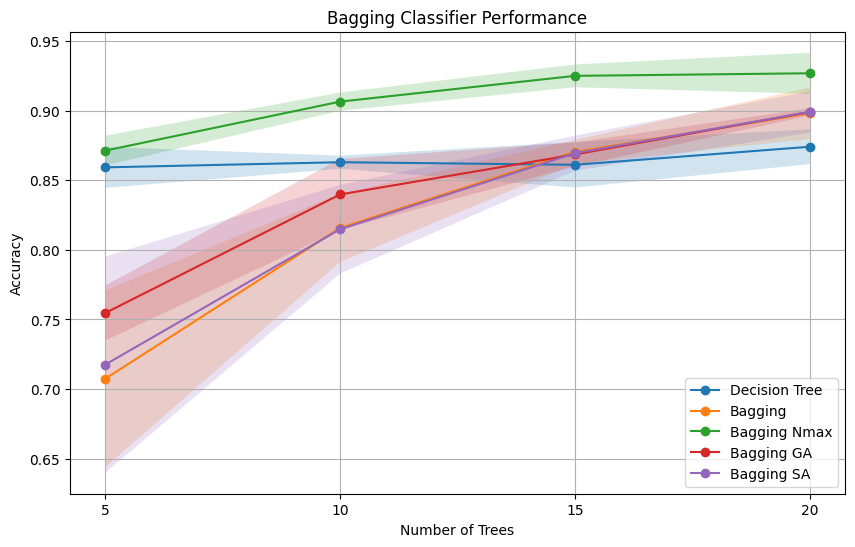

In [6]:
import matplotlib.pyplot as plt

results_df = pd.read_csv(f'./../res/bagging_multiple_results_{reps}.csv')

plt.figure(figsize=(10, 6))

X = results_df['n_trees']
dt_mean = results_df['decision_tree_mean']
dt_std = results_df['decision_tree_std']
bagging_ga_mean = results_df['bagging_ga_mean']
bagging_ga_std = results_df['bagging_ga_std']
bagging_mean = results_df['bagging_mean']
bagging_std = results_df['bagging_std']
bagging_nmax_mean = results_df['bagging_nmax_mean']
bagging_nmax_std = results_df['bagging_nmax_std']
bagging_sa_mean = results_df['bagging_sa_mean']
bagging_sa_std = results_df['bagging_sa_std']

plt.plot(X, dt_mean, marker='o', label='Decision Tree')
plt.fill_between(X, dt_mean - dt_std, dt_mean + dt_std, alpha=0.2)

plt.plot(X, bagging_mean, marker='o', label='Bagging')
plt.fill_between(X, bagging_mean - bagging_std,
                 bagging_mean + bagging_std, alpha=0.2)

plt.plot(X, bagging_nmax_mean, marker='o', label='Bagging Nmax')
plt.fill_between(X, bagging_nmax_mean - bagging_nmax_std,
                 bagging_nmax_mean + bagging_nmax_std, alpha=0.2)

plt.plot(X, bagging_ga_mean, marker='o', label='Bagging GA')
plt.fill_between(X, bagging_ga_mean - bagging_ga_std,
                 bagging_ga_mean + bagging_ga_std, alpha=0.2)

plt.plot(X, bagging_sa_mean, marker='o', label='Bagging SA')
plt.fill_between(X, bagging_sa_mean - bagging_sa_std,
                 bagging_sa_mean + bagging_sa_std, alpha=0.2)
plt.title('Bagging Classifier Performance')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(X)
plt.grid()
plt.savefig('./../res/bagging_multiple_results.png')